<a href="https://colab.research.google.com/github/vpaliwal1/Disaster-Tweets-Using-NLP/blob/master/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#read the data and convert into dataframe using pandas
from google.colab import files

uploaded = files.upload()
train=pd.read_csv("train.csv")

Saving train.csv to train (2).csv


In [0]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test (1).csv


In [0]:
import pandas as pd

In [0]:

print(train.shape)

(7613, 5)


In [0]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:

testing=pd.read_csv("test.csv")
testing.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
train["target"].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

In [0]:
train.groupby('target').describe()

id                            ...                         
         count         mean          std  ...     50%     75%      max
target                                    ...                         
0       4342.0  5276.446338  3157.206802  ...  5243.5  8038.5  10848.0
1       3271.0  5661.608071  3097.094809  ...  5676.0  8252.0  10873.0

[2 rows x 8 columns]

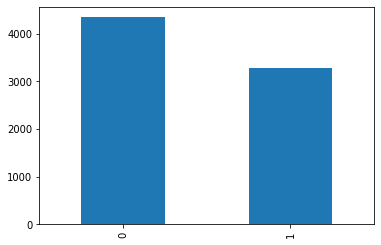

In [0]:
train['target'].value_counts().plot(kind='bar')

In [0]:
#Let's make a new column to detect how long the reviews are
train['length'] = train['text'].apply(len)
train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

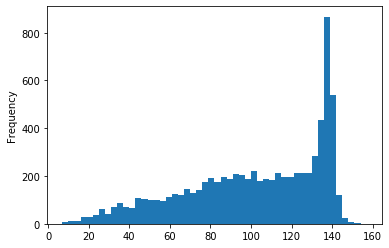

In [0]:
train['length'].plot(bins=50, kind='hist') 

In [0]:
train.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [0]:
train[train['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96a7f37f60>,
      dtype=object)

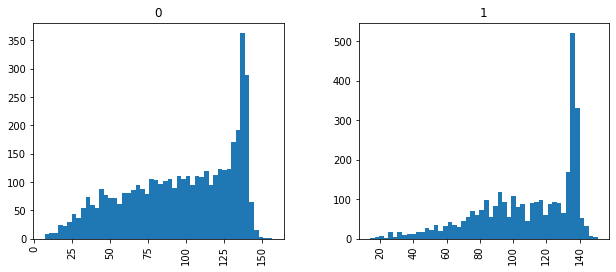

In [0]:
train.hist(column='length', by='target', bins=50,figsize=(10,4))

In [0]:
classes = train['target']
print(classes.value_counts())

0    4342
1    3271
Name: target, dtype: int64


In [0]:
train = train.drop(["length"], axis=1)

In [0]:
df=pd.concat([train,test])
df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10876, 5)

In [0]:
df.head()

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...


In [0]:
#to remove the Html tags like (br)
from bs4 import BeautifulSoup
df['text']=df['text'].apply(lambda x: BeautifulSoup(x,"html5lib").get_text())

In [0]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [0]:
text_comments = df["text"]

In [0]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = text_comments.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [0]:
print(text_comments[:10])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object


In [0]:
#remove puntuations
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [0]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed[:10])

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    numbr numbr people receive wildfires evacuatio...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update california hwy numbr closed i...
6    flood disaster heavy rain causes flash floodin...
7    i m on top of the hill and i can see a fire in...
8    there s an emergency evacuation happening now ...
9    i m afraid that the tornado is coming to our area
Name: text, dtype: object


In [0]:
import nltk

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [0]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


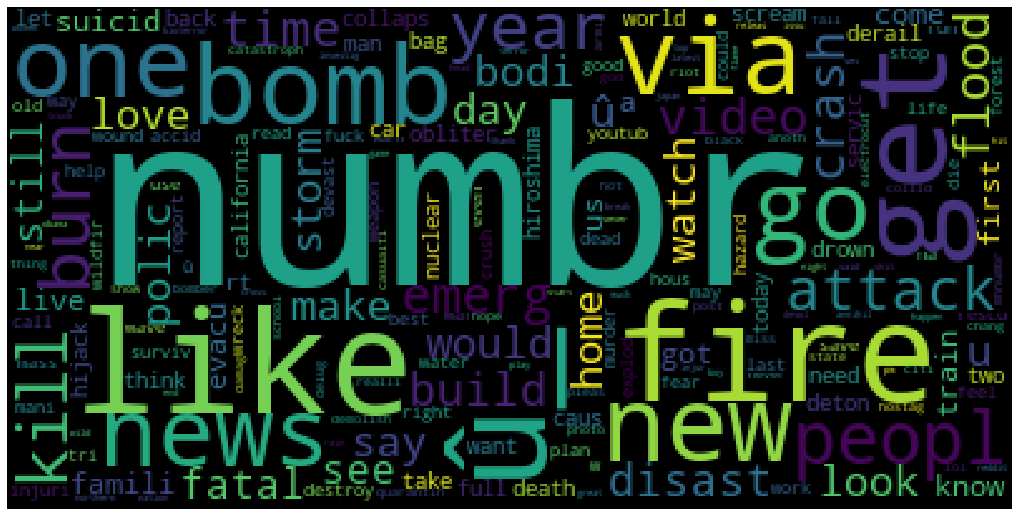

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(all_words)
figure = plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 16827
Most common words: [('numbr', 3455), ('like', 591), ('fire', 534), ('û_', 508), ('get', 456), ('bomb', 337), ('new', 329), ('via', 325), ('one', 296), ('go', 291), ('news', 288), ('peopl', 286), ('burn', 258), ('year', 253), ('kill', 253)]


In [0]:
# use the 2000 most common words as features
word_features = list(all_words.keys())[:2500]

In [0]:
# The find_features function will determine which of the 2000 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# # Lets see an example!
# features = find_features(processed[0])
# for key, value in features.items():
#     if value == True:
#         print (key)

In [0]:
import numpy as np
# Now lets do it for all the reviews
print(processed.shape)
clean = processed[:train.shape[0]]
print(clean.shape)
messages = list(zip(clean, classes))
test = processed[train.shape[0]:]
print(test.shape)

# define a seed for reproducibility
seed = 1
np.random.seed = seed
#shuffle so that both reviews get mix
np.random.shuffle(messages)

# call find_features function for each reviews
featuresets = [(find_features(text), label) for (text, label) in messages]

(10876,)
(7613,)
(3263,)


In [0]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.15, random_state=seed)

In [0]:
print(len(training))
print(len(testing))

6471
1142


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "SGD Classifier",
         "Naive Bayes", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    MLPClassifier(alpha=1),
     AdaBoostClassifier( n_estimators = 100)
    
]

models = zip(names, classifiers)
names1 = []
results = []

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))
    names1.append(name)
    results.append(accuracy)

K Nearest Neighbors Accuracy: 70.14010507880911
Decision Tree Accuracy: 73.20490367775831
Random Forest Accuracy: 76.09457092819615
SGD Classifier Accuracy: 76.35726795096322
Naive Bayes Accuracy: 75.65674255691769
Neural Net Accuracy: 76.88266199649738
AdaBoost Accuracy: 75.30647985989492


In [0]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = [ "Random Forest", "SGD Classifier",
         "Naive Bayes","Neural Net", "AdaBoost"]

classifiers = [
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 75.30647985989492


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

27711


In [0]:
review10 = df['text'][:9]
print (review10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
Name: text, dtype: object


In [0]:
reviews_bow = bow_transformer.transform(clean)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)

In [0]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print (reviews_tfidf.shape)

(7613, 27711)


In [0]:
reviews_bow_test = bow_transformer.transform(test)
tfidf_transformer_test = TfidfTransformer().fit(reviews_bow_test)
reviews_tfidf_test = tfidf_transformer_test.transform(reviews_bow_test)
print (reviews_tfidf_test.shape)

(3263, 27711)


In [0]:
# train model with ML algo
from sklearn.naive_bayes import MultinomialNB
review_detect_model = MLPClassifier(alpha=1).fit(reviews_tfidf, train['target'])

In [0]:
all_predictions = review_detect_model.predict(reviews_tfidf)
print (all_predictions)

[0 1 1 ... 1 1 1]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(train['target'], all_predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      4342
           1       0.89      0.62      0.73      3271

    accuracy                           0.81      7613
   macro avg       0.83      0.78      0.79      7613
weighted avg       0.82      0.81      0.80      7613



In [0]:
all_predictions1 = review_detect_model.predict(reviews_tfidf_test)
print (all_predictions1[:10])

[1 0 1 0 1 0 0 0 0 0]


In [0]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(clean, train['target'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

6090 1523 7613


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  LogisticRegression(n_jobs=1, C=1e5)),  # train on TF-IDF vectors w/ Neural Net
])

In [0]:
pipeline.fit(msg_train,label_train)

C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002433B064EA0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                       

In [0]:
predictions = pipeline.predict(msg_test)

In [0]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       861
           1       0.72      0.70      0.71       662

    accuracy                           0.75      1523
   macro avg       0.75      0.74      0.75      1523
weighted avg       0.75      0.75      0.75      1523



In [0]:
pd.DataFrame(
    confusion_matrix(predictions, label_test),
    index = [['actual', 'actual'], ['positive', 'negative']],
    columns = [['predicted', 'predicted'], ['positive', 'negative']])

predicted         
                 positive negative
actual positive       682      179
       negative       201      461

In [0]:
predictions1 = pipeline.predict(test)

In [0]:
print(predictions1[:10])

[0 1 1 1 1 1 0 0 0 0]


In [0]:
sample_sub=pd.read_csv('sample_submission.csv')

In [0]:
y_pre=pipeline.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission1.csv',index=False)

In [0]:
sub.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1


In [0]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
train_data = train.text.values
train_labels = train.target.values
test_data = testing.text.values

In [0]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 3.9MB 57.7MB/s 
     |████████████████████████████████| 450kB 42.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
%%time
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/4'
embed = hub.KerasLayer(module_url, trainable=False, name='USE_embedding')

CPU times: user 8.81 s, sys: 2.22 s, total: 11 s
Wall time: 11.4 s


In [0]:
def build_model(embed):
    model = Sequential([
        Input(shape=[], dtype=tf.string),
        embed,
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [0]:
model = build_model(embed)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_embedding (KerasLayer)   {'outputs': (None, 512)}  147354880 
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [0]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_data, train_labels,
    validation_split=0.15,
    epochs=50,
    callbacks=[checkpoint],
    batch_size=32
)

Train on 6471 samples, validate on 1142 samples
Epoch 1/50
6471/6471 [==============================] - 86s 13ms/sample - loss: 0.9592 - accuracy: 0.5486 - val_loss: 0.6740 - val_accuracy: 0.5902
Epoch 2/50
6471/6471 [==============================] - 57s 9ms/sample - loss: 0.7892 - accuracy: 0.6246 - val_loss: 0.6078 - val_accuracy: 0.7426
Epoch 3/50
6471/6471 [==============================] - 57s 9ms/sample - loss: 0.7156 - accuracy: 0.6671 - val_loss: 0.4999 - val_accuracy: 0.7811
Epoch 4/50
6471/6471 [==============================] - 58s 9ms/sample - loss: 0.6556 - accuracy: 0.7022 - val_loss: 0.4538 - val_accuracy: 0.7960
Epoch 5/50
6471/6471 [==============================] - 57s 9ms/sample - loss: 0.6071 - accuracy: 0.7259 - val_loss: 0.4340 - val_accuracy: 0.8082
Epoch 6/50
6471/6471 [==============================] - 57s 9ms/sample - loss: 0.5822 - accuracy: 0.7418 - val_loss: 0.4231 - val_accuracy: 0.8170
Epoch 7/50
6471/6471 [==============================] - 57s 9ms/sampl

In [0]:
model.load_weights('model.h5')
test_pred = model.predict(test_data)

In [0]:
print(test_pred.round().astype(int))

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [0]:
df = test_pred.round().astype(int)

In [0]:
df[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [0]:
df = pd.DataFrame(data=df)

In [0]:
df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [0]:
df.to_csv('filename.csv') 

files.download('filename.csv')

In [0]:
test.head()

0                             happen terribl car crash
1        heard earthquak differ citi stay safe everyon
2    forest fire spot pond gees flee across street ...
3                       apocalyps light spokan wildfir
4             typhoon soudelor kill numbr china taiwan
Name: text, dtype: object

In [0]:
testing1 = testing.text.values

In [0]:
model.load_weights('model.h5')
test_pred = model.predict(testing1)

In [0]:
print(test_pred.round().astype(int))

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [0]:
df1 = test_pred.round().astype(int)

In [0]:
df1 = pd.DataFrame(data=df1)

In [0]:
df1.head(10)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,0


In [0]:
df1.to_csv('filename2.csv') 

files.download('filename2.csv')